In [2]:
import heron
import heron.regression as hgp

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import signal

In [65]:
gp = hgp.load("/home/daniel/repositories/heron/scripts/paper_models/models/undiscovered snafu.gp")

In [66]:
gp.training_data

array([[0.64607679, 0.        , 0.71381555, ..., 0.36937852, 0.        ,
        1.        ],
       [0.64774624, 0.        , 0.71381555, ..., 0.36937852, 0.        ,
        1.        ],
       [0.64941569, 0.        , 0.71381555, ..., 0.36937852, 0.        ,
        1.        ],
       ...,
       [0.9966611 , 0.        , 0.14144666, ..., 0.        , 0.        ,
        1.        ],
       [0.99833055, 0.        , 0.14144666, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.14144666, ..., 0.        , 0.        ,
        1.        ]])

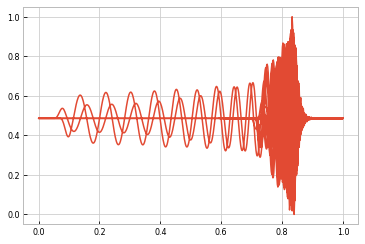

In [67]:
plt.plot(gp.training_data[:,0], gp.training_y)

In [150]:
noise = np.random.randn(200)*0.01
noisy_data = gp.training_y[:200]+noise

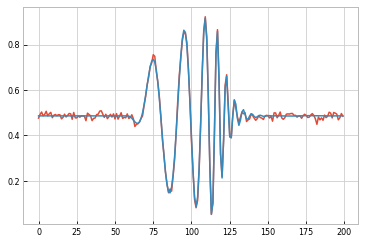

In [151]:
plt.plot(noisy_data)
plt.plot(gp.training_y[:200])

In [128]:
from matplotlib.mlab import psd

In [137]:
f, Pxx_den = signal.periodogram(noisy_data, 1024, nfft=512)

2.988521290043023e+19

In [159]:
def inner_product_noise(x, y, psd=None,  srate=16834):
    """
    Calculate the noise-weighted inner product of two random functions
    """
    nfft = 4*srate
    window = signal.get_window(('tukey', 0.1), len(x))
    fwindow = signal.get_window(('tukey', 0.1), nfft)

    wdata = noisy_data*window

    xy = np.fft.rfft(wdata, nfft)*np.fft.rfft(wdata, nfft).conj()
    if not psd:
        psd, pfreqs = psd(wdata, NFFT=nfft, Fs=srate, window=fwindow, noverlap=0)
    return 4*np.real(np.sum(xy/psd))

In [190]:
def matched_likelihood(data, template, psd=None, srate=16834):
    """
    Calculate the simple match of some data, given a template, and return its
    log-likelihood.
    
    Parameters
    ----------
    data : `np.ndarray`
        An array of data which is believed to contain a signal.
    template : `np.ndarray`
        An array containing a template to match to the data.
    """
    return -0.5 * inner_product_noise(data-template, data-template, srate)

In [191]:
matched_likelihood(noisy_data, gp.training_y[:200], psd, srate = 100)

-32560.30273121358

In [193]:
def matched_likelihood_uncert(data, template, template_sigma,
                              psd=None, srate=16834):
    """
    Calculate the simple match of some data, given a noisy template, and return its
    log-likelihood.
    
    Parameters
    ----------
    data : `np.ndarray`
        An array of data which is believed to contain a signal.
    template : `np.ndarray`
        An array containing a template to match to the data.
    """
    return -0.5 * inner_product_noise(data-template, data-template, srate)

In [68]:
from heron.sampling import draw_samples

In [74]:
cross = dict(zip(gp.training_object.target_names, gp.training_data[0]))
cross['t'] = [0,1,500]

In [75]:
locs = draw_samples(gp, **cross)

In [76]:
pred = gp.prediction(locs, normalised=True)

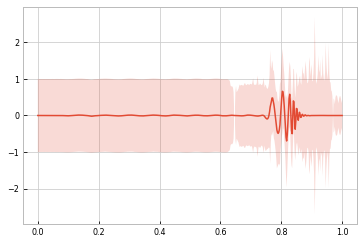

In [86]:
plt.plot(locs[:,0], pred[0])
uncer = pred[1]/pred[1].max()
plt.fill_between(locs[:,0], pred[0]+uncer, pred[0]-uncer, alpha=0.2)

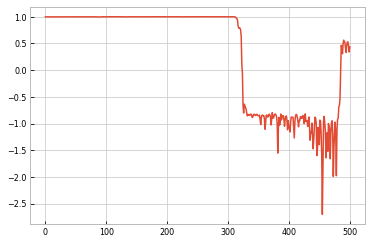